In [1]:
import pandas as pd
import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# Data Preparation

In [2]:
Students = pd.read_csv("StudentsPerformance.csv")
Students.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
Students.info() #no nulls to handle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race                         1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
Students['average_score'] = Students[['math score','reading score','writing score']].mean(axis=1)
# this is study about effect of Social factors on students performance -> so we won't consider diffirent subjects score instead we consider avg score as indicator of performance
Students.drop(['math score','reading score','writing score'], axis=1, inplace=True)

# Data Understanding and Intial Staticts

## 1. Categorical Data

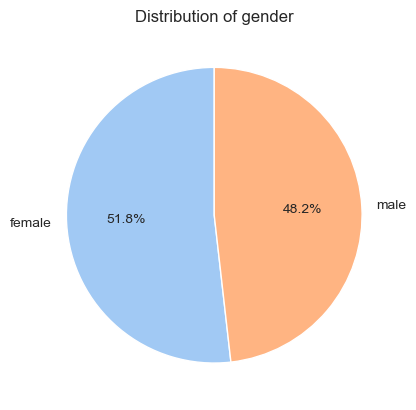

Count: {'female': 518, 'male': 482}


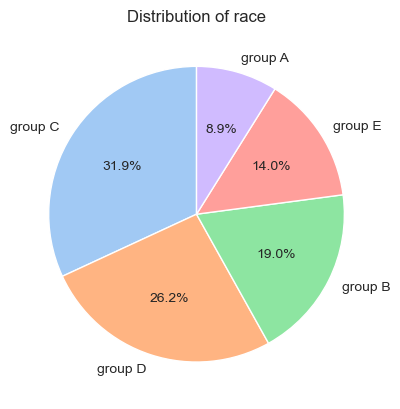

Count: {'group C': 319, 'group D': 262, 'group B': 190, 'group E': 140, 'group A': 89}


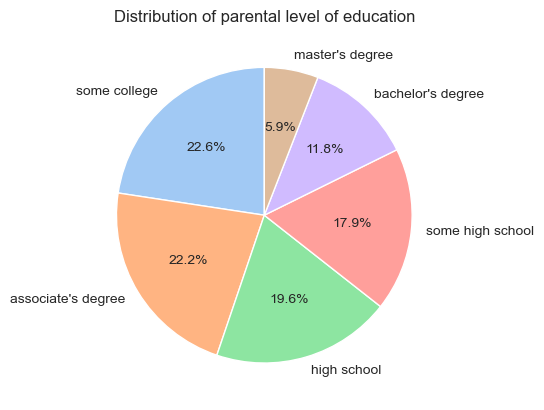

Count: {'some college': 226, "associate's degree": 222, 'high school': 196, 'some high school': 179, "bachelor's degree": 118, "master's degree": 59}


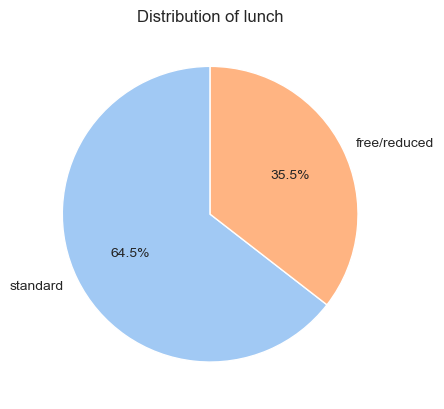

Count: {'standard': 645, 'free/reduced': 355}


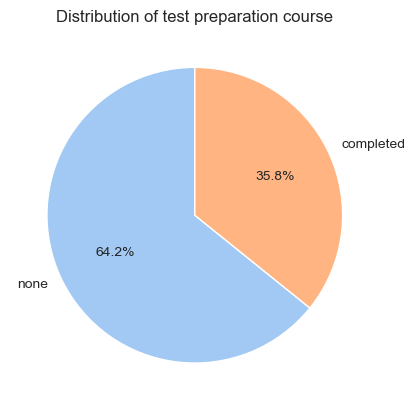

Count: {'none': 642, 'completed': 358}


In [5]:
Qualitative = ['gender', 'race', 'parental level of education', 'lunch', 'test preparation course']
for col in Qualitative:
    counts = Students[col].value_counts()
    counts.plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel'), 
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.show()
    print(f"Count: {counts.to_dict()}")

## 2. Quantitative Data

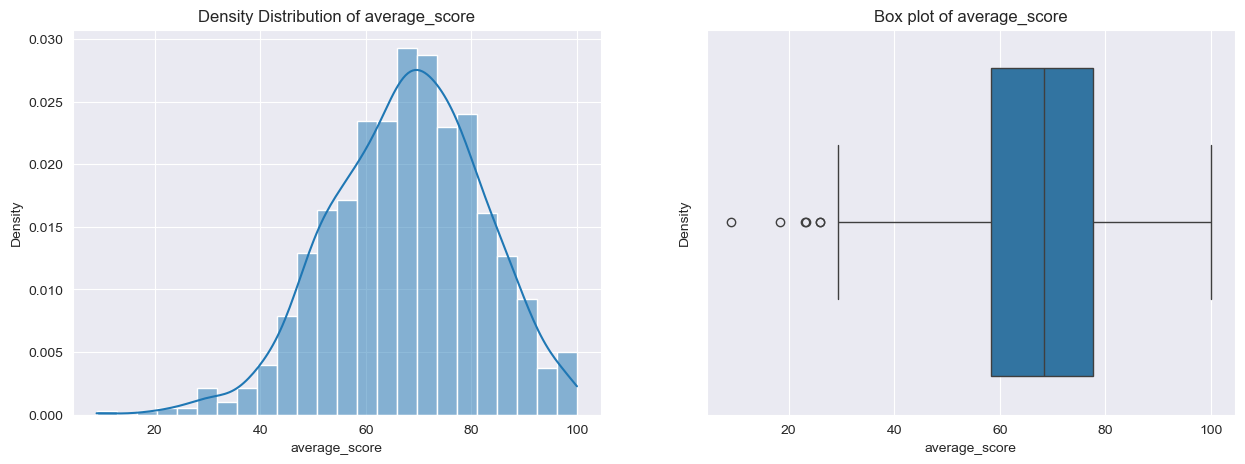

In [6]:
Quantitative = ['average_score']
rows = len(Quantitative)
fig, ax = plt.subplots(rows,2,figsize=(15,5*rows))
ax=ax.flatten()
for i, col in enumerate(Quantitative):
    sns.histplot(Students[col] , kde=True , stat='density', ax=ax[2*i])
    ax[2*i].set_title(f'Density Distribution of {col}')
    plt.xlabel(col)    
    plt.ylabel('Density')
    sns.boxplot(x=Students[col] , ax=ax[2*i+1])
    ax[2*i+1].set_title(f'Box plot of {col}')


In [7]:
Desc=Students.describe().T
Desc['skewness'] = Students[Quantitative].skew()
Desc

,count,mean,std,min,25%,50%,75%,max,skewness
average_score,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0,-0.299057


# Relations between one variable and Target

In [8]:
# applying Hypothesis Testing to check dependency
# -> comparing means independent -> using ttest-ind in case of 2 categories & Anova for more than 2 categories

#### does the gender affects on performance?

<Axes: ylabel='average_score'>

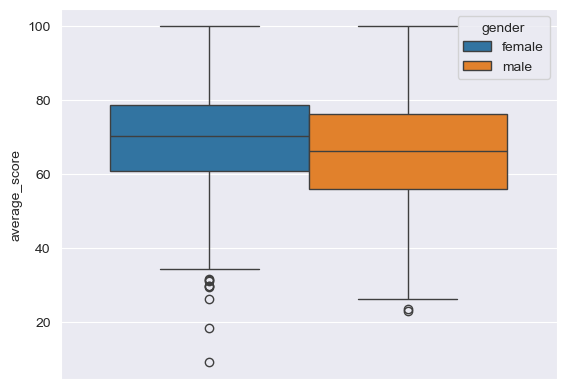

In [9]:
# no action to be taken -> no Test needed to support this action (it's just Exploratory Analysis)
sns.boxplot(y='average_score' , data= Students,hue='gender')

#### does the lunch type affects on performance?

Reject H0:Low_income seems to face difficulties stoping them from perfoming well.


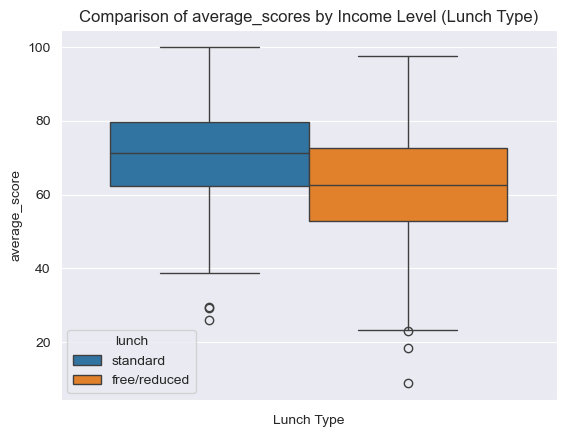

In [10]:
# h0 : mean(average_score) of High_Medium_income <= mean(average_score) of Low_income
# h1 : mean(average_score) of High_Medium_income > mean(average_score) of Low_income 
# tailed -> greater
from scipy.stats import ttest_ind
alpha=0.05
Low_income = Students[Students['lunch']!='standard']['average_score']
High_Medium_income = Students[Students['lunch']=='standard']['average_score']
t_stat , pval = ttest_ind(High_Medium_income,Low_income)
if pval/2 < alpha and t_stat > 0 :
        print ("Reject H0:Low_income seems to face difficulties stoping them from perfoming well.")
else:
    print ("Can't Reject H0:There is no significant difference between Low_income and High_Medium_income.")
sns.boxplot(y='average_score' , data= Students,hue='lunch')
plt.title("Comparison of average_scores by Income Level (Lunch Type)")
plt.ylabel("average_score")
plt.xlabel("Lunch Type")
plt.show()

#### does the preparation course affects on performance?

Reject H0:test preparation course seems to have good effect on perfomance


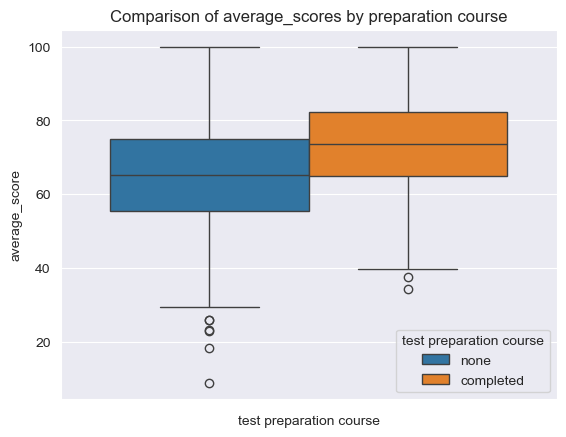

In [11]:
# h0 : mean(average_score) of completed preparation <= mean(average_score) of no preparation
# h1 : mean(average_score) of completed preparation > mean(average_score) of no preparation
# tailed -> greater
none = Students[Students['test preparation course']=='none']['average_score']
completed = Students[Students['test preparation course']=='completed']['average_score']
t_stat , pval = ttest_ind(completed,none)
if pval/2 < alpha and t_stat > 0 :
        print ("Reject H0:test preparation course seems to have good effect on perfomance")
else:
    print ("Can't Reject H0:There is no significant difference . ")
sns.boxplot(y='average_score' , data= Students,hue='test preparation course')
plt.title("Comparison of average_scores by preparation course")
plt.ylabel("average_score")
plt.xlabel("test preparation course")
plt.show()

--------

Reject H0: There is a significant difference in average_score between groups (p = 3.23e-07)


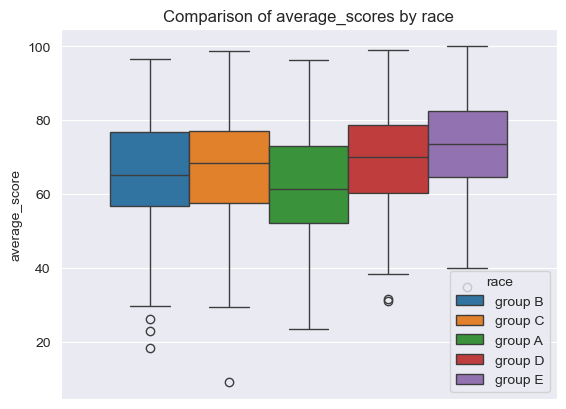

Reject H0: There is a significant difference in average_score between groups (p = 4.38e-10)


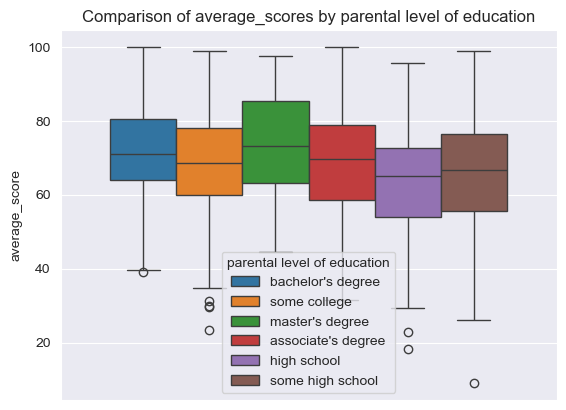

In [12]:
# oneway anova for categorical columns with more than 2 categories
from scipy.stats import f_oneway
multi_categorics_data = ['race','parental level of education']
for col in multi_categorics_data:
    groups = [Students[Students[col] == category]['average_score'] 
              for category in Students[col].unique()]
    f_stat, p_val = f_oneway(*groups)
    if p_val < alpha:
        print(f"Reject H0: There is a significant difference in average_score between groups (p = {p_val:.2e})")
    else:
        print(f"Fail to reject H0: No significant difference found (p = {p_val:.2e})")
    sns.boxplot(y='average_score' , data=Students , hue=col)
    plt.title(f"Comparison of average_scores by {col}")
    plt.show()

# Relations between more than one variable and Target

#### who handles income issues better , males or females 

                           sum_sq     df          F        PR(>F)
C(lunch)             17424.582517    1.0  95.486157  1.340864e-21
C(gender)             3816.488299    1.0  20.914234  5.407318e-06
C(lunch):C(gender)     413.136948    1.0   2.263977  1.327306e-01
Residual            181752.881416  996.0        NaN           NaN


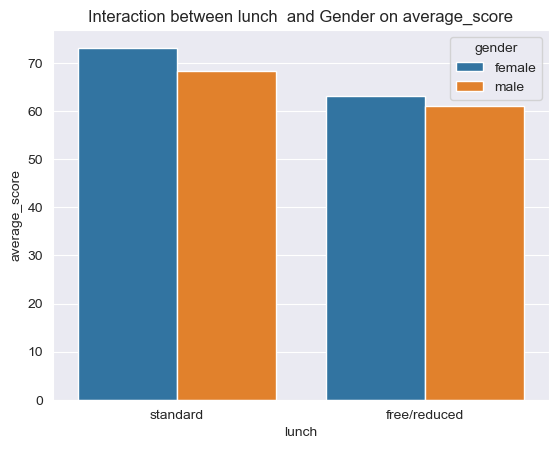

In [13]:
# h0 : no difference
# h1 : there is difference
# twoway anova
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('average_score ~ C(lunch) + C(gender) + C(lunch):C(gender)', data=Students).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

sns.barplot(x='lunch', y='average_score', hue='gender', data=Students, errorbar=None)
plt.title("Interaction between lunch  and Gender on average_score")
plt.show()

In [14]:
#sameway 
males_low = Students[
    (Students['lunch'] != 'standard') &
    (Students['gender'] == 'male')
]['average_score']
females_low = Students[
    (Students['lunch'] != 'standard') &
    (Students['gender'] == 'female')
]['average_score']
ttest_ind(males_low,females_low)

TtestResult(statistic=-1.4149010248585954, pvalue=0.15797902633874217, df=353.0)

In [15]:
# p[C(lunch)] < 0.05 -> reject H0 ------> there is effect
# p[C(gender)] < 0.05 -> reject H0 ------> there is effect
# # p[C(gender):C(lunch)] > 0.05 -> Can't reject H0 ------> each factor in dependent on each other affecting the performan

# Relation between all Variables to check correlation

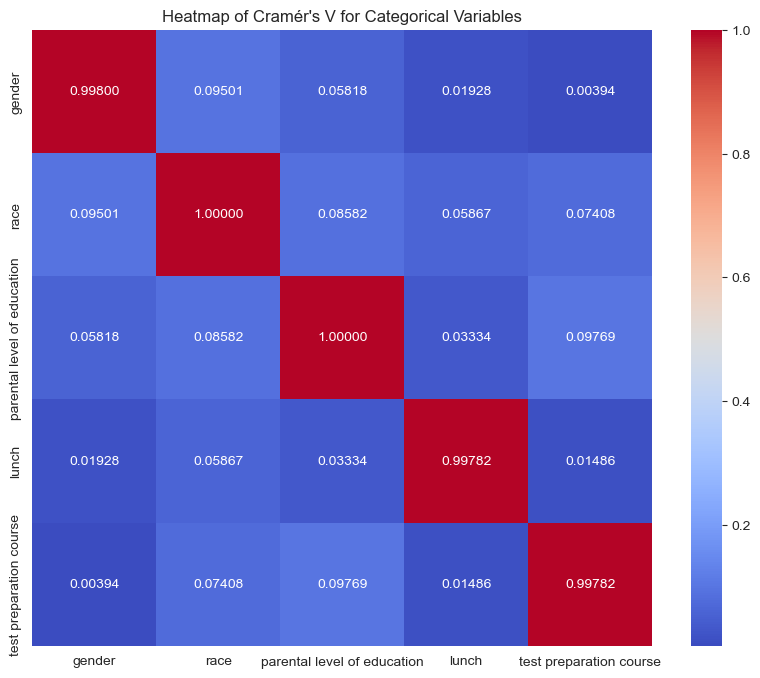

In [17]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

import seaborn as sns
import matplotlib.pyplot as plt

n = len(Qualitative)
cramers_matrix = pd.DataFrame(np.zeros((n,n)), index=Qualitative, columns=Qualitative)

for i in range(n):
    for j in range(n):
            cramers_matrix.iloc[i,j] = cramers_v(Students[Qualitative[i]], Students[Qualitative[j]])

# رسم Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", fmt=".5f")
plt.title("Heatmap of Cramér's V for Categorical Variables")
plt.show()


# Conculsion

### Student Performance
- The density distribution is approximately normal with slight skewness, making parametric tests appropriate.

#### Effect of Income (Lunch)
- Students from low-income families (free/reduced lunch) performed worse than students from medium/high-income families (standard lunch).
- Economic support plays an important role in student performance.

#### Effect of Test Preparation (Test Preparation Course):
- Students who completed the preparation course performed significantly better.
- Test Preparation Course is effective

#### Other Social Factors:
- Parental Level of Education: Significant differences in performance among groups (ANOVA).
- Race: Significant differences in performance among racial groups.
- Gender: Significant main effect on performance, but no meaningful interaction with Lunch (Two-way ANOVA showed non-significant interaction).

#### Relationships Between Categorical Variables:
- Cramér’s showed no strong association between variables
- in case of dimensionality reduction , information will be lost

### Overall Insights
- Student performance is influenced by multiple social factors, especially income, test preparation, parental education .
- Each factor largely acts independently, with minimal interaction between gender and income.
- These findings provide actionable insights for educational policies or student support programs.